## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### Dynamic Programming 

In [3]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [4]:
len(original_price)

10

In [5]:
from collections import defaultdict
price = defaultdict(int)

In [6]:
for i, p in enumerate(original_price):
    price[i+1] = p

In [7]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30})

#### Get the splitting to maximize the price

In [11]:
call_time_with_arg = defaultdict(int)

In [12]:
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
#     fname = r.__name__
#     call_time_with_arg[(fname, n)] += 1
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [13]:
r(15)

43

In [15]:
from collections import Counter
Counter(call_time_with_arg).most_common()

[(('r', 1), 3188646),
 (('r', 2), 1062882),
 (('r', 3), 354294),
 (('r', 4), 118098),
 (('r', 5), 39366),
 (('r', 6), 13122),
 (('r', 7), 4374),
 (('r', 8), 1458),
 (('r', 9), 486),
 (('r', 10), 162),
 (('r', 11), 54),
 (('r', 12), 18),
 (('r', 13), 6),
 (('r', 14), 2),
 (('r', 15), 1)]

In [27]:
r(10)

30

In [33]:
r(15)

43

In [38]:
r(15)

43

In [79]:
called_time_with_arg = defaultdict(int)  # initialize to zero

In [75]:
# import decorator to count the function called times

def count_func_called_times(func):
    
    def wrapper(n):
        # This is the function after wrapped; Here only decorating it with count ability
        result = func(n)
        called_time_with_arg[(func.__name__, n)] += 1
        return result
    
    return wrapper

In [76]:
@count_func_called_times
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [77]:
r(15)

43

In [78]:
called_time_with_arg

defaultdict(int,
            {('r', 1): 3188646,
             ('r', 2): 1062882,
             ('r', 3): 354294,
             ('r', 4): 118098,
             ('r', 5): 39366,
             ('r', 6): 13122,
             ('r', 7): 4374,
             ('r', 8): 1458,
             ('r', 9): 486,
             ('r', 10): 162,
             ('r', 11): 54,
             ('r', 12): 18,
             ('r', 13): 6,
             ('r', 14): 2,
             ('r', 15): 1})

In [71]:
r

<function __main__.count_func_called_times.<locals>.wrapper(n)>

In [81]:
# add another decorator to try cache first to save time

def use_cache(func):
    
    use_cache.already_computed = {}
    
    def wrapper(n):
        if n in use_cache.already_computed:
            result = use_cache.already_computed[n]
        else:
            result = func(n)
            use_cache.already_computed[n] = result
    
        return result
    
    return wrapper
    

In [82]:
@count_func_called_times
@use_cache
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [87]:
r(234)

700

In [88]:
called_time_with_arg

defaultdict(int,
            {('wrapper', 1): 466,
             ('wrapper', 2): 464,
             ('wrapper', 3): 462,
             ('wrapper', 4): 460,
             ('wrapper', 5): 458,
             ('wrapper', 6): 456,
             ('wrapper', 7): 454,
             ('wrapper', 8): 452,
             ('wrapper', 9): 450,
             ('wrapper', 10): 449,
             ('wrapper', 11): 446,
             ('wrapper', 12): 444,
             ('wrapper', 13): 442,
             ('wrapper', 14): 440,
             ('wrapper', 15): 438,
             ('wrapper', 16): 436,
             ('wrapper', 17): 434,
             ('wrapper', 18): 432,
             ('wrapper', 19): 430,
             ('wrapper', 20): 429,
             ('wrapper', 21): 426,
             ('wrapper', 22): 424,
             ('wrapper', 23): 422,
             ('wrapper', 24): 420,
             ('wrapper', 25): 418,
             ('wrapper', 26): 416,
             ('wrapper', 27): 414,
             ('wrapper', 28): 412,
            

#### Suppot optimal split

In [94]:
solution = {}

In [95]:
@count_func_called_times
@use_cache
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    
    solution[n] = (n - max_split, max_split)
    
    return max_price

In [98]:
r(38)

112

In [99]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (16, 1),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (20, 1),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (26, 1),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10),
 31: (30, 1),
 32: (30, 2),
 33: (30, 3),
 34: (32, 2),
 35: (33, 2),
 36: (30, 6),
 37: (36, 1),
 38: (36, 2)}

In [111]:
parse_solution = 2

In [120]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [123]:
parse_solution(38)

[10, 10, 10, 6, 2]

#### Machine Learning and Gradient Descent

In [124]:
from sklearn.datasets import load_boston

In [152]:
data = load_boston()

In [ ]:
data = load_boston

In [132]:
X, Y = data['data'], data['target']

In [134]:
X.shape

(506, 13)

In [135]:
Y.shape

(506,)

In [139]:
type(X)

numpy.ndarray

In [150]:
X?

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

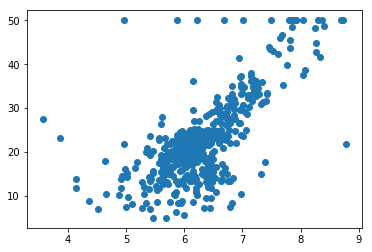

In [154]:
draw_rm_and_price()

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [162]:
def loss(Y, Y_hat):
    return sum(abs( Y - Y_hat)) / len(Y)

In [174]:
import numpy as np

In [194]:
# Calcualte the gradient of loss function
def partial_k(X, Y, Y_hat):
    # when y > y_hat, derivative to y_hat is -1
    # when y < y_hat, derivative to y_hat is 1
    # when y == y_hat, math derivative does not exist, here we specify it as zero
    
    # Here use numpy to do vector operations directly
    gradient = -1 * np.dot(np.sign(Y - Y_hat), X)/ len(Y)
    return gradient


def partial_b(X, Y, Y_hat):
    gradient = -1 * np.dot(np.sign(Y - Y_hat), X) / len(Y)
    
    return gradient 

In [221]:
epoch = 10000

# Initialize k and b
k = random.random()
b = random.random()

X_rm = X[:, 5]

learning_rate = 0.001

for i in range(epoch):
    Y_hat = k * X_rm + b
    current_loss = loss(Y, Y_hat)
    if i % 100 == 0:
        print ("Epoch {}: Loss is {}".format(i, current_loss))
    
    # gradient descent
    current_partial_k = partial_k(X_rm, Y, Y_hat)
    current_partial_b = partial_b(X_rm, Y, Y_hat)
    
    #update k and b
    k = k - learning_rate * current_partial_k
    b = b - learning_rate * current_partial_b

print ("Final k and b are {}, {}".format(k, b))

Epoch 0: Loss is 19.12245555715206
Epoch 100: Loss is 14.626515327958664
Epoch 200: Loss is 10.758536645909297
Epoch 300: Loss is 8.12641787185117
Epoch 400: Loss is 6.63334907220613
Epoch 500: Loss is 5.869424761150876
Epoch 600: Loss is 5.631542716950256
Epoch 700: Loss is 5.5767848755080855
Epoch 800: Loss is 5.569832790674129
Epoch 900: Loss is 5.56933758455964
Epoch 1000: Loss is 5.569167232911223
Epoch 1100: Loss is 5.569165156379661
Epoch 1200: Loss is 5.569193480284024
Epoch 1300: Loss is 5.5691932281950205
Epoch 1400: Loss is 5.569194186719485
Epoch 1500: Loss is 5.569193934630469
Epoch 1600: Loss is 5.569193682541475
Epoch 1700: Loss is 5.569193430452472
Epoch 1800: Loss is 5.569193205224587
Epoch 1900: Loss is 5.569194136887938
Epoch 2000: Loss is 5.569193884798929
Epoch 2100: Loss is 5.569193632709925
Epoch 2200: Loss is 5.569193380620925
Epoch 2300: Loss is 5.569193184056582
Epoch 2400: Loss is 5.569194087056385
Epoch 2500: Loss is 5.569193834967381
Epoch 2600: Loss is 5.5

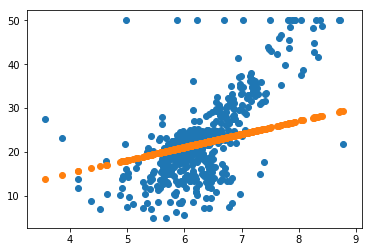

In [222]:
X_rm = X[:, 5]
Y_hat = k * X_rm + b

draw_rm_and_price()
plt.scatter(X_rm, Y_hat)

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [29]:
solution = {}

In [69]:
def edit_distance(str1, str2):
    if len(str1) == 0:
        if str2:
            operation = 'ADD {}'.format(str2[-1])
            solution[(str1, str2)] = operation
        else:
            solution[(str1, str2)] = ''
        return len(str2)
    
    if len(str2) == 0:
        if str1:
            operation = "DEL {}".format(str1[-1])
            solution[(str1, str2)] = operation
        else:
            solution[(str1, str2)] = ''
        return len(str1)
    
    if str1[-1] == str2[-1]:
        operation = ''  # operation is empty
        solution[(str1, str2)] = operation
        return (edit_distance(str1[:-1], str2[:-1])) 
    else:
        distance, operation = min([(edit_distance(str1[:-1], str2[:-1]) + 1, 'SUB {}=>{}'.format(str1[-1], str2[-1])),
                                  (edit_distance(str1[:-1], str2) + 1, "DEL {}".format(str1[-1])), 
                                  (edit_distance(str1, str2[:-1]) + 1, "ADD {}".format(str2[-1]))], 
                                  key=lambda x: x[0]
                                 )
        solution[(str1, str2)] = operation
        return distance

In [87]:
def parse_solution(str1, str2):
    partial_solution = solution[(str1, str2)]
    
    if (not str1) and (not str2):
        return [partial_solution]
    
    if partial_solution == '':
        return [partial_solution] + parse_solution(str1[:-1], str2[:-1])
    
    elif 'SUB' in partial_solution:
        return [partial_solution] + parse_solution(str1[:-1], str2[:-1])
    
    elif 'DEL' in partial_solution:
        return [partial_solution] + parse_solution(str1[:-1], str2)
        
    elif 'ADD' in partial_solution:
        return [partial_solution] + parse_solution(str1, str2[:-1])
    
def pretty_parse_solution(str1, str2):
    solutions = parse_solution(str1, str2)
    neat_solutions = []
    for solution in solutions:
        if solution and (solution not in neat_solutions):
            neat_solutions.append(solution)
    
    return neat_solutions

In [82]:
edit_distance('ABCDE', 'ABCCEF')

2

In [83]:
solution

{('', 'b'): 'ADD b',
 ('', 'bc'): 'ADD c',
 ('', ''): '',
 ('a', ''): 'DEL a',
 ('a', 'b'): 'SUB a=>b',
 ('a', 'bc'): 'SUB a=>c',
 ('ABC', 'ABCC'): '',
 ('', 'A'): 'ADD A',
 ('', 'AB'): 'ADD B',
 ('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('', 'ABC'): 'ADD C',
 ('A', 'ABC'): 'ADD C',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('', 'ABCC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('', 'ABCCE'): 'ADD E',
 ('A', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABC'): '',
 ('A', ''): 'DEL A',
 ('AB', ''): 'DEL B',
 ('AB', 'A'): 'DEL B',
 ('ABC', ''): 'DEL C',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABCD', ''): 'DEL D',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D=>C',
 ('ABCD', 'ABCCE'): 'SUB D=>E',
 ('', 'ABCCEF'): 'ADD F',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'ABCCEF'): 'SUB D=>F',
 ('ABCDE', 'ABCCE'): '',
 

In [88]:
pretty_parse_solution('ABCDE', 'ABCCEF')

['ADD F', 'SUB D=>C']

In [90]:
solution = {}
edit_distance('abcdef', 'azced')
solution

{('abcde', 'azce'): '',
 ('a', ''): 'DEL a',
 ('a', 'a'): '',
 ('', ''): '',
 ('ab', ''): 'DEL b',
 ('ab', 'a'): 'DEL b',
 ('', 'a'): 'ADD a',
 ('', 'az'): 'ADD z',
 ('a', 'az'): 'ADD z',
 ('ab', 'az'): 'SUB b=>z',
 ('abc', ''): 'DEL c',
 ('abc', 'a'): 'DEL c',
 ('abc', 'az'): 'SUB c=>z',
 ('abc', 'azc'): '',
 ('abcd', ''): 'DEL d',
 ('abcd', 'a'): 'DEL d',
 ('abcd', 'az'): 'SUB d=>z',
 ('abcd', 'azc'): 'DEL d',
 ('', 'azc'): 'ADD c',
 ('a', 'azc'): 'ADD c',
 ('ab', 'azc'): 'SUB b=>c',
 ('', 'azce'): 'ADD e',
 ('a', 'azce'): 'ADD e',
 ('ab', 'azce'): 'SUB b=>e',
 ('abc', 'azce'): 'ADD e',
 ('abcd', 'azce'): 'SUB d=>e',
 ('abcd', 'azced'): '',
 ('abcde', 'azced'): 'SUB e=>d',
 ('abcde', ''): 'DEL e',
 ('abcde', 'a'): 'DEL e',
 ('abcde', 'az'): 'SUB e=>z',
 ('abcde', 'azc'): 'DEL e',
 ('abcdef', ''): 'DEL f',
 ('abcdef', 'a'): 'DEL f',
 ('abcdef', 'az'): 'SUB f=>z',
 ('abcdef', 'azc'): 'DEL f',
 ('abcdef', 'azce'): 'DEL f',
 ('abcdef', 'azced'): 'SUB f=>d'}

In [91]:
pretty_parse_solution('abcdef', 'azced')

['SUB f=>d', 'DEL d', 'SUB b=>z']

In [92]:
solution = {}
edit_distance('a', 'bc')

2

In [93]:
solution

{('', 'b'): 'ADD b',
 ('', 'bc'): 'ADD c',
 ('', ''): '',
 ('a', ''): 'DEL a',
 ('a', 'b'): 'SUB a=>b',
 ('a', 'bc'): 'SUB a=>c'}

In [95]:
pretty_parse_solution('a', 'bc')

['SUB a=>c', 'ADD b']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

In [3]:
# Choose "Fluent Python" since i just bought the book.

## Part 5-1: review machine learning

In [1]:
# Since the questions are covered in Assignment-02, copy the answers here

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: Because the gradient represents the largest/maximum direction in which the target increases. So along with the inververse direction, we could find the minmum of the target function most efficiently.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans: The gradient is a vector(ine one dimension, it's a scalar), with that direction, the target function increases most quickly. Descent means the inverse direction of the gradient, in which direction, the target funcion decreases most quickly. So we use this method to iteratively find the minimum of one function


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

 Ans: It's the most efficient way to find the minmimum of the target function

4. Using the simple words to describe: What's the machine leanring.¶

Ans: Given a dataset, define a loss function, assume the relationship between X and Y, using the Gradient Descent to find the optimal parameters to minimize the defined loss function.

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: Because dynamic programming could solve complex problems by breaking it into smaller simple subproblems by recursive way. I think the difference is that DP is greedy search, while the optimal solution of search problem is not greedy.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans: Because using the cache to store the intermediate results, DP could slove complex problem using a relatively efficient way. I didn't try using ML to solve DP problems, but i think it's going to be interesting to try it. A problem which comes to my mind is that it's difficult to collect a big enought dataset to train such a model. But i think we could at leat try RNN a bit.

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans: Shortest path problem; Fibonacci sequence; Edit distance;Rob Cutting Problem

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: Automatical spelling correction; In bioinformatics, it can be used to quantify the similarity of DNA sequences; Evaluating Machine Translation and speech recognition

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans: 1. Overlapping subproblems 2.Overlapping computing saved in a table 3. Parse solution

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans: I guess the problem is that the stack could not be very deep, so DP could not slove very big problem.

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

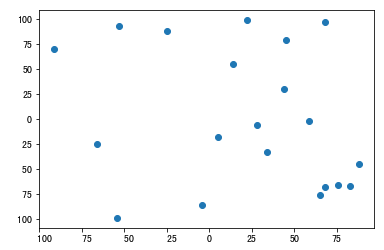

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

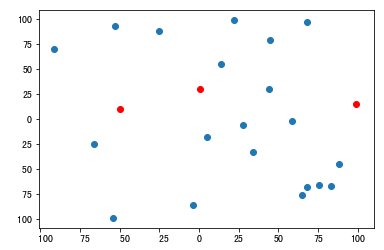

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')